In [1]:
import numpy as np
import pandas as pd

In [2]:
csv_1 = "./CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv"
csv_2 = "./CTA_-_System_Information_-_List_of__L__Stops.csv"

In [3]:
ridership_df = pd.read_csv(csv_1, delimiter = ',')
ridership_df.head()

,station_id,stationname,date,daytype,rides
0,40850,Library,10/09/2004,A,1057
1,40780,Central Park,06/18/2010,W,1154
2,41500,Montrose-Brown,10/30/2001,W,2116
3,40500,Washington/State,10/26/2006,W,0
4,41090,Monroe/State,07/07/2010,W,9431


In [4]:
l_stops_df = pd.read_csv(csv_2, delimiter = ',')
l_stops_df.head()

,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30162,W,18th (54th/Cermak-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
1,30161,E,18th (Loop-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,30022,N,35th/Archer (Loop-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
3,30023,S,35th/Archer (Midway-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,30214,S,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"


In [5]:
station_bools = l_stops_df[['MAP_ID','ADA','RED','BLUE','G','BRN','P','Pexp','Y','Pnk','O']
].groupby('MAP_ID').any()
l_stops_df = l_stops_df.drop(['STOP_ID', 'DIRECTION_ID', 'STOP_NAME',
'ADA','RED','BLUE','G','BRN','P','Pexp','Y','Pnk','O'], axis=1) \
    .merge(station_bools, how='left', left_on='MAP_ID',
right_index=True).drop_duplicates()

In [6]:
l_stops_df.count()

STATION_NAME                146
STATION_DESCRIPTIVE_NAME    146
MAP_ID                      146
Location                    146
ADA                         146
RED                         146
BLUE                        146
G                           146
BRN                         146
P                           146
Pexp                        146
Y                           146
Pnk                         146
O                           146
dtype: int64

In [7]:
l_stops_df[['latitude','longitude']] = l_stops_df['Location'].str.replace('\(|\)','', regex=True).str.split(',',expand=True).apply(pd.to_numeric)

In [8]:
df_merge = pd.merge(ridership_df, l_stops_df, how='left', left_on='station_id',right_on='MAP_ID')

In [9]:
df_merge.head()

,station_id,stationname,date,daytype,rides,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,Location,ADA,...,BLUE,G,BRN,P,Pexp,Y,Pnk,O,latitude,longitude
0,40850,Library,10/09/2004,A,1057,Harold Washington Library-State/Van Buren,Harold Washington Library-State/Van Buren (Bro...,40850.0,"(41.876862, -87.628196)",True,...,False,False,True,False,True,False,True,True,41.876862,-87.628196
1,40780,Central Park,06/18/2010,W,1154,Central Park,Central Park (Pink Line),40780.0,"(41.853839, -87.714842)",True,...,False,False,False,False,False,False,True,False,41.853839,-87.714842
2,41500,Montrose-Brown,10/30/2001,W,2116,Montrose,Montrose (Brown Line),41500.0,"(41.961756, -87.675047)",True,...,False,False,True,False,False,False,False,False,41.961756,-87.675047
3,40500,Washington/State,10/26/2006,W,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41090,Monroe/State,07/07/2010,W,9431,Monroe,Monroe (Red Line),41090.0,"(41.880745, -87.627696)",False,...,False,False,False,False,False,False,False,False,41.880745,-87.627696


In [10]:
df_merge['south_side'] = df_merge['latitude'] < 41.881
df_merge[['south_side','rides']].groupby('south_side').mean()

,rides
south_side,
False,3702.526825
True,2997.803824


In [14]:
df_merge['year'] = pd.DatetimeIndex(df_merge['date']).year
df_merge.head()

,station_id,stationname,date,daytype,rides,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,Location,ADA,...,BRN,P,Pexp,Y,Pnk,O,latitude,longitude,south_side,year
0,40850,Library,10/09/2004,A,1057,Harold Washington Library-State/Van Buren,Harold Washington Library-State/Van Buren (Bro...,40850.0,"(41.876862, -87.628196)",True,...,True,False,True,False,True,True,41.876862,-87.628196,True,2004
1,40780,Central Park,06/18/2010,W,1154,Central Park,Central Park (Pink Line),40780.0,"(41.853839, -87.714842)",True,...,False,False,False,False,True,False,41.853839,-87.714842,True,2010
2,41500,Montrose-Brown,10/30/2001,W,2116,Montrose,Montrose (Brown Line),41500.0,"(41.961756, -87.675047)",True,...,True,False,False,False,False,False,41.961756,-87.675047,False,2001
3,40500,Washington/State,10/26/2006,W,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2006
4,41090,Monroe/State,07/07/2010,W,9431,Monroe,Monroe (Red Line),41090.0,"(41.880745, -87.627696)",False,...,False,False,False,False,False,False,41.880745,-87.627696,True,2010


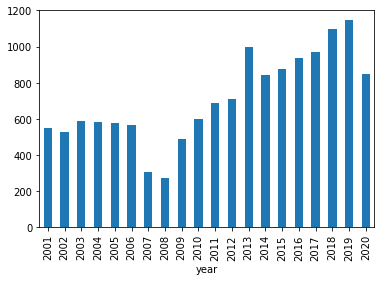

In [15]:
rides_by_sides = df_merge[['year','south_side','rides']] \
    .groupby(['year','south_side']).mean() \
    .reset_index() \
    .pivot(index='year',columns='south_side',values='rides')
rides_by_sides.columns = ['north','south']
(rides_by_sides['north'] - rides_by_sides['south']).plot(kind='bar')

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [17]:
# reflect an existing database into a new model
engine = create_engine("sqlite:///Census_Data.sqlite")
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [18]:
# We can view all of the classes that automap found
Base.classes.keys()

[]